In [12]:
%matplotlib inline

import numpy as np
import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align
import glob
print(MDAnalysis.__version__)

2.2.0


/Users/owner/opt/anaconda3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [13]:
import numpy as np
from time import time
import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align
import MDAnalysis.analysis.hbonds
import matplotlib.pyplot as plt
import itertools as it
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

start_time = time.time()



var_xtc = '/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/zone8.xtc'

    
################################################################################################################ 
################################################################################################################
var_gro = '/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/trajectory_files/active_mek_wt_protein.gro' 
u = mda.Universe(var_gro,var_xtc)


hbonds = HBA(u, hydrogens_sel='protein and (resid 208 to 233) and name HN', acceptors_sel='protein  and (resid 208 to 233) and  name O', donors_sel='protein and (resid 208 to 233) and name N', d_h_a_angle_cutoff =150, d_a_cutoff=3.2,d_h_cutoff=1.2)
hbonds.run()

end_time = time.time()
t = end_time - start_time
print(t) 

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hbonds/hbond_autocorrel.py:52: DeprecationWarning: This module was moved to MDAnalysis.analysis.hydrogenbonds.hbond_autocorrel; hbonds.hbond_autocorrel will be removed in 3.0.0.
  warnings.warn(wmsg, category=DeprecationWarning)


0.7896180152893066


In [14]:
hbonds.count_by_ids()

/Users/owner/opt/anaconda3/lib/python3.9/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:672: DeprecationWarning: The `hbonds` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.hbonds` instead.
  warnings.warn(wmsg, DeprecationWarning)


array([[3015, 3016, 2962,   94],
       [2991, 2992, 2950,   44],
       [2974, 2975, 2931,   35],
       [3139, 3140, 3082,   21],
       [3001, 3002, 2973,   17],
       [2963, 2964, 2912,    8],
       [3118, 3119, 3082,    7],
       [3083, 3084, 3045,    4],
       [3069, 3070, 3045,    3],
       [2963, 2964, 2931,    3],
       [3015, 3016, 2950,    2],
       [3139, 3140, 3106,    1],
       [3107, 3108, 3061,    1],
       [2991, 2992, 2962,    1]])

In [15]:
with open('/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/trajectory_files/active_mek_wt_protein.gro') as f:
    
    lines = f.readlines()
        
new_lines = []    
# Get rid of empty lines
for line in lines:
    # Strip whitespace, should leave nothing if empty line was just "\n"
    if not line.strip():
        continue
    # We got something, save it
    else:
        new_lines.append(line)
        
lines = new_lines[2:]
y1 = []
y2 = []
y3 = []
for i in range(0,len(lines)):
    
    words = lines[i].split()
    int_lst = [str(x) for x in words]
   
    y1.append(int_lst[0]) #y1 
    y2.append(int_lst[1]) #y2 
    y3.append(int_lst[2]) #y3 

y1.pop()
y2.pop()
y3.pop()

'8.02342'

In [16]:
amide_hbonds = np.zeros((len(y1),2))

In [18]:
y2

In [22]:

amide_hbonds

In [23]:
p_h = []
for i in range(0,len(y1)):
    if y2[i]=='N':
        amide_hbonds[i][0] = int("".join([s for s in y1[i] if s.isdigit()]))
        
        amide_hbonds[i][1] = int(y3[i])  - 1 # since the hbonds data is stored  as based 0
    if y2[i]=='HN':
        p_h.append(i)

In [25]:
p =  np.where(amide_hbonds[:,0]  != 0)
p = np.array(p)
p[0]

In [27]:
p[0] + 1

In [28]:
hbonds.count_by_ids()

array([[3015, 3016, 2962,   94],
       [2991, 2992, 2950,   44],
       [2974, 2975, 2931,   35],
       [3139, 3140, 3082,   21],
       [3001, 3002, 2973,   17],
       [2963, 2964, 2912,    8],
       [3118, 3119, 3082,    7],
       [3083, 3084, 3045,    4],
       [3069, 3070, 3045,    3],
       [2963, 2964, 2931,    3],
       [3015, 3016, 2950,    2],
       [3139, 3140, 3106,    1],
       [3107, 3108, 3061,    1],
       [2991, 2992, 2962,    1]])

In [29]:
hmat = hbonds.count_by_ids()

In [30]:
result = []
for i in range(0,len(hbonds.count_by_ids())):
    for j in range(i+1, len(hbonds.count_by_ids())):
        
        if hbonds.count_by_ids()[i][0] == hbonds.count_by_ids()[j][0]:
            hmat[i][3] = hmat[i][3] + hmat[j][3]
        
        
        
    

In [31]:
rmat = []

In [32]:

rmat= [hmat[0].tolist()]
rmat

[[3015, 3016, 2962, 96]]

In [33]:
for i in range(1,len(hmat)):
    if hmat[i].tolist()[0] not in [j[0] for j in rmat]:
        rmat.append(hmat[i].tolist())
    
    
    
    

In [34]:
hmat[i].tolist()[0]

2991

In [35]:
len(rmat)

10

In [36]:
len(hmat)

14

In [37]:
rmat

[[3015, 3016, 2962, 96],
 [2991, 2992, 2950, 45],
 [2974, 2975, 2931, 35],
 [3139, 3140, 3082, 22],
 [3001, 3002, 2973, 17],
 [2963, 2964, 2912, 11],
 [3118, 3119, 3082, 7],
 [3083, 3084, 3045, 4],
 [3069, 3070, 3045, 3],
 [3107, 3108, 3061, 1]]

In [22]:
for i in range(0,len(rmat)):
    rmat[i][3] = rmat[i][3] / len(u.trajectory)

In [4]:
rmat

In [24]:
oxy_atom = [i[2] for i in rmat]

In [25]:
nitro_atom =[i[0] for i in rmat]

In [2]:
dmat = []
for i in range(0,len(rmat)):
    oxy_res_num = int("".join([s for s in y1[oxy_atom[i]-1] if s.isdigit()]))
    nitro_res_num = int("".join([s for s in y1[nitro_atom[i]-1] if s.isdigit()]))
    print(oxy_res_num - nitro_res_num )
    if np.abs(oxy_res_num - nitro_res_num ) == 4:
        dmat.append(rmat[i])
        

In [10]:
dmat

In [3]:
## check
oxy_atom = [j[2] for j in dmat]
nitro_atom = [j[0] for j in dmat]

for i in range(0,len(dmat)):
    oxy_res_num = int("".join([s for s in y1[oxy_atom[i]-1] if s.isdigit()]))
    nitro_res_num = int("".join([s for s in y1[nitro_atom[i]-1] if s.isdigit()]))
    print(oxy_res_num - nitro_res_num)


In [29]:
f = p[0] + 1

In [1]:
f.tolist()

In [31]:
ind = []
for i in range(0,len(dmat)):
    ind.append(f.tolist().index(dmat[i][0]))
    
    

In [32]:
ind 

[186, 185, 196, 184, 193, 194]

In [33]:
res = np.array(ind) + 34 - 1

In [34]:
occupancies = np.array([j[3] for j in dmat])
occupancies

array([0.36290323, 0.28225806, 0.17741935, 0.08870968, 0.03225806,
       0.00806452])

<BarContainer object of 6 artists>

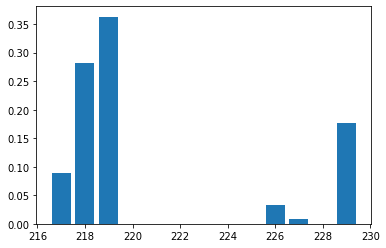

In [35]:
plt.bar(res, occupancies)

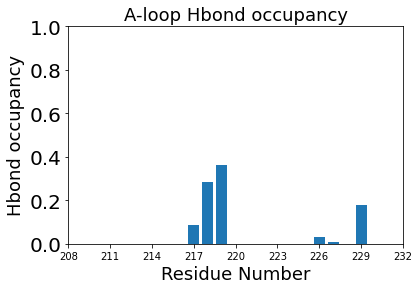

In [36]:
#ax.plot(bins, y, '--')
plt.xlabel('Residue Number',fontsize=18)
plt.ylabel('Hbond occupancy',fontsize=18)
plt.title('A-loop Hbond occupancy',fontsize=18)
plt.bar(res, occupancies)
plt.ylim((0,1))
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)

plt.xticks(np.arange(208,234,3).tolist())
# Tweak spacing to prevent clipping of ylabel

plt.savefig('Zone8_aloop_occupancy.png', bbox_inches = 'tight', dpi = 300)
plt.show()